In [1]:
from tensorflow.keras import backend as K
K.clear_session()

In [2]:
!pip install rarfile

In [3]:
import os
import pandas as pd
import gdown
import rarfile
import shutil
from PIL import Image
# Download the RAR file
url = 'https://drive.google.com/uc?id=1psgNbXAF12c1jdX_GE5kXas0hL470ati'
#https://drive.google.com/file/d/1g3EkPk0jPOVxHnsd4BqoRLZoznfFkdeC/view?usp=sharing
output_rar = '/content/Agumented_&_Enhanced_Leguminosae_3C_Dataset.rar'
gdown.download(url, output_rar, quiet=False)
# Extract the RAR file
with rarfile.RarFile(output_rar, 'r') as rar_ref:
    rar_ref.extractall('/content')

Downloading...
From (original): https://drive.google.com/uc?id=1psgNbXAF12c1jdX_GE5kXas0hL470ati
From (redirected): https://drive.google.com/uc?id=1psgNbXAF12c1jdX_GE5kXas0hL470ati&confirm=t&uuid=d92b56cb-6e07-4f67-b771-821ade301894
To: /content/Agumented_&_Enhanced_Leguminosae_3C_Dataset.rar
100%|██████████| 88.5M/88.5M [00:01<00:00, 81.0MB/s]


In [4]:
# Path to the extracted dataset folder

dataset = '/content/Agumented_&_Enhanced_Leguminosae_3C_Dataset'

Found 3726 images belonging to 4 classes.
Found 522 images belonging to 4 classes.
Found 1084 images belonging to 4 classes.
Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


117/117 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.6632 - loss: 0.8006 - val_accuracy: 0.2644 - val_loss: 2.1307
Epoch 2/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 54s 457ms/step - accuracy: 0.9088 - loss: 0.2703 - val_accuracy: 0.2414 - val_loss: 7.2466
Epoch 3/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 86s 487ms/step - accuracy: 0.9223 - loss: 0.2082 - val_accuracy: 0.2529 - val_loss: 8.6867
Epoch 4/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 53s 451ms/step - accuracy: 0.9491 - loss: 0.1476 - val_accuracy: 0.4387 - val_loss: 5.2445
Epoch 5/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 53s 451ms/step - accuracy: 0.9420 - loss: 0.1532 - val_accuracy: 0.8755 - val_loss: 0.5577
Epoch 6/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 83s 462ms/step - accuracy: 0.9443 - loss: 0.1534 - val_accuracy: 0.8372 - val_loss: 0.5569
Epoch 7/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 81s 458ms/step - accuracy: 0.9731 - loss: 0.0758 - val_accuracy: 0.9023 - val_loss: 0.3147
Epoch 8/60
117/117 ━━━━━━━━━━━━━━━━━━━━ 82s 461ms/step - accuracy: 0.9736 - loss: 0.0732 - val_a

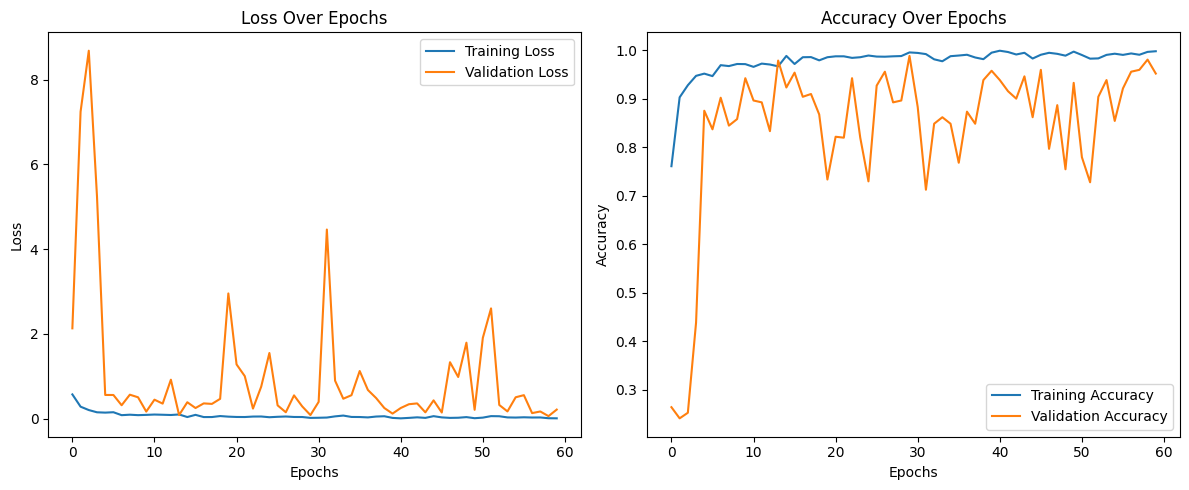

34/34 ━━━━━━━━━━━━━━━━━━━━ 24s 550ms/step

Performance on Test Data
Precision: 0.9641189743565767
Recall: 0.9612546125461254
F1 Score: 0.9611353859927283
Accuracy: 0.9612546125461254
Confusion Matrix:
                      Acacia_Modesta  Albizia_Lebbeck  Bauhinia_Variegatav  \
Acacia_Modesta                  236               28                    0   
Albizia_Lebbeck                   0              255                    1   
Bauhinia_Variegatav               0                0                  270   
Unknown                           0                3                    4   

                     Unknown  
Acacia_Modesta             4  
Albizia_Lebbeck            2  
Bauhinia_Variegatav        0  
Unknown                  281  


In [5]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Add,
    GlobalAveragePooling2D, Flatten, Dense
)
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Directory for the dataset
data_dir = dataset

# Define the CNN architecture

# Initialize the InceptionV3 model without pre-trained weights
inception_model = InceptionV3(weights=None, include_top=False, input_shape=(299, 299, 3))
# Create a custom model for binary classification
model = models.Sequential()
# Add the InceptionV3 base
model.add(inception_model)

# Add global average pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a dense layer with 1024 units and ReLU activation
model.add(layers.Dense(1024, activation='relu'))

# Add a final output layer with 2 units and softmax activation for multi-class (2-class) classification
model.add(layers.Dense(4, activation='softmax'))  # 4 output neurons for 4 classes

# Print the model summary


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'Train'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'Validate'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(data_dir, 'Test'),
    target_size=(299, 299),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

# Training the model
history = model.fit(train_generator, epochs=60, validation_data=val_generator)

# Plot training results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Helper function to evaluate the model on given test generator
def evaluate_model(test_generator, model, classes, title="Performance"):
    y_test_pred = model.predict(test_generator)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
    recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
    f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
    accuracy = accuracy_score(test_generator.labels, y_test_pred)

    print(f"\n{title}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Accuracy:", accuracy)

    # Display the confusion matrix
    confusion = confusion_matrix(test_generator.labels, y_test_pred)
    confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
    print("Confusion Matrix:\n", confusion_df)

# Test the model on the test set
evaluate_model(test_generator, model, ['Acacia_Modesta', 'Albizia_Lebbeck', 'Bauhinia_Variegatav', 'Unknown'], title="Performance on Test Data")


# image form of confusion matrix
# Helper function to evaluate the model on given test generator
# def evaluate_model(test_generator, model, classes, title="Performance"):
#     y_test_pred = model.predict(test_generator)
#     y_test_pred = np.argmax(y_test_pred, axis=1)

#     precision = precision_score(test_generator.labels, y_test_pred, average='weighted')
#     recall = recall_score(test_generator.labels, y_test_pred, average='weighted')
#     f1 = f1_score(test_generator.labels, y_test_pred, average='weighted')
#     accuracy = accuracy_score(test_generator.labels, y_test_pred)

#     print(f"\n{title}")
#     print("Precision:", precision)
#     print("Recall:", recall)
#     print("F1 Score:", f1)
#     print("Accuracy:", accuracy)

#     # Display the confusion matrix
#     confusion = confusion_matrix(test_generator.labels, y_test_pred)
#     confusion_df = pd.DataFrame(confusion, index=classes, columns=classes)
#     print("Confusion Matrix:\n", confusion_df)

#     # Plot confusion matrix as heatmap
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g')
#     plt.title(f'Confusion Matrix - {title}')
#     plt.ylabel('True Labels')
#     plt.xlabel('Predicted Labels')
#     plt.show()
